In [1]:
import numpy as np
import pandas as pd

In [2]:
##import tensorflow as tf
##tf.logging.set_verbosity(tf.logging.ERROR)

import keras as ks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
## Read in the entire data set just for eyeballing.
pd_data = pd.read_csv('K_data.csv', header=None)
np_data = np.array(pd_data.values, dtype=np.float32) ## float32 might be better if using a GPU
pd_data

,0,1,2,3,4,5
0,1.729100e-03,1.509,0.52360,3,2,0.0100
1,1.965300e-03,1.558,0.54105,3,2,0.0100
2,2.224300e-03,1.607,0.55851,3,2,0.0100
3,2.507300e-03,1.656,0.57596,3,2,0.0100
4,2.815600e-03,1.705,0.59341,3,2,0.0100
5,3.150700e-03,1.753,0.61087,3,2,0.0100
6,3.513700e-03,1.802,0.62832,3,2,0.0100
7,3.906100e-03,1.850,0.64577,3,2,0.0100
8,4.329200e-03,1.898,0.66323,3,2,0.0100
9,4.784300e-03,1.946,0.68068,3,2,0.0100


In [17]:
## Read in the training data, which includes both the input features and the outputs K.
pd_train = pd.read_csv('K_training_randomized.csv', header=None)
np_train = np.array(pd_train.values, dtype=np.float32) ## float32 might be better if using a GPU
np_train

array([[2.6582e-04, 9.4500e-01, 1.5010e+00, ..., 4.0000e+00, 1.0000e-02,
        2.0000e-01],
       [6.9525e-03, 2.1370e+00, 7.5049e-01, ..., 2.0000e+00, 1.0000e-02,
        5.0000e-01],
       [5.4947e-12, 1.1000e-02, 5.2360e-01, ..., 4.0000e+00, 1.0000e-03,
        6.0000e-01],
       ...,
       [1.3298e-10, 2.5000e-02, 1.2217e+00, ..., 4.0000e+00, 1.0000e-03,
        9.9180e+02],
       [2.5089e-16, 1.0000e-03, 1.4835e+00, ..., 4.0000e+00, 1.0000e-04,
        9.9600e+02],
       [1.9636e-06, 2.7700e-01, 9.0757e-01, ..., 2.0000e+00, 1.0000e-04,
        9.9640e+02]], dtype=float32)

In [19]:
np_train[0:5]

array([[2.6582e-04, 9.4500e-01, 1.5010e+00, 9.0000e+00, 4.0000e+00,
        1.0000e-02, 2.0000e-01],
       [6.9525e-03, 2.1370e+00, 7.5049e-01, 3.0000e+00, 2.0000e+00,
        1.0000e-02, 5.0000e-01],
       [5.4947e-12, 1.1000e-02, 5.2360e-01, 9.0000e+00, 4.0000e+00,
        1.0000e-03, 6.0000e-01],
       [2.5987e-10, 3.0000e-02, 1.5533e+00, 4.0000e+00, 3.0000e+00,
        1.0000e-04, 2.7000e+00],
       [8.0264e-11, 2.2000e-02, 1.0996e+00, 4.0000e+00, 3.0000e+00,
        1.0000e-04, 3.4000e+00]], dtype=float32)

In [20]:
## Extract the input features: theta, m, n, h_star
features = np_train[:, 2:6]
features

array([[1.5010e+00, 9.0000e+00, 4.0000e+00, 1.0000e-02],
       [7.5049e-01, 3.0000e+00, 2.0000e+00, 1.0000e-02],
       [5.2360e-01, 9.0000e+00, 4.0000e+00, 1.0000e-03],
       ...,
       [1.2217e+00, 9.0000e+00, 4.0000e+00, 1.0000e-03],
       [1.4835e+00, 9.0000e+00, 4.0000e+00, 1.0000e-04],
       [9.0757e-01, 3.0000e+00, 2.0000e+00, 1.0000e-04]], dtype=float32)

In [21]:
## Extract the correct outputs K
correct_outputs = np_train[:, 1]
correct_outputs

array([9.450e-01, 2.137e+00, 1.100e-02, 3.000e-02, 2.200e-02, 6.820e-01,
       4.050e-01, 1.195e+00, 1.000e-03, 1.705e+00, 2.200e-02, 2.500e-02,
       1.690e-01, 2.278e+00, 1.500e-02, 2.959e+00, 6.180e-01, 3.864e+00,
       2.719e+00, 2.400e-02, 1.000e-03, 3.427e+00, 2.320e-01, 3.176e+00,
       2.486e+00, 2.390e-01, 1.000e-03, 2.650e-01, 1.600e-02, 3.000e-02,
       1.391e+00, 1.500e-02, 8.530e-01, 1.000e-03, 1.208e+00, 9.360e-01,
       7.760e-01, 3.090e+00, 2.110e-01, 1.700e-02, 8.240e-01, 2.520e-01,
       1.400e-02, 7.910e-01, 8.340e-01, 1.130e-01, 7.030e-01, 4.430e-01,
       1.230e-01, 1.885e+00, 6.510e-01, 2.602e+00, 0.000e+00, 3.261e+00,
       9.090e-01, 2.300e-02, 2.694e+00, 0.000e+00, 5.750e-01, 2.930e-01,
       3.710e-01, 1.000e-03, 1.500e-02, 6.610e-01, 1.188e+00, 4.740e-01,
       3.590e-01, 2.800e-02, 0.000e+00, 1.007e+00, 1.762e+00, 6.300e-01,
       2.800e-02, 2.800e-02, 0.000e+00, 3.760e-01, 2.980e-01, 3.890e-01,
       2.200e-01, 2.064e+00, 2.720e-01, 1.315e+00, 

In [22]:
## Read in the test data, which includes both the input features and the outputs K.
pd_test = pd.read_csv('K_testing.csv', header=None)
np_test = pd_test.values
num_tests = len(np_test)

In [43]:
##  Define a model.
layer_0 = ks.layers.Dense(units=50, input_shape=[4])
layer_1 = ks.layers.Dense(units=50, input_shape=[4])
layer_2 = ks.layers.Dense(units=1)
model_0 = ks.Sequential([layer_0, layer_1, layer_2])
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_0.compile(loss='mean_squared_error',
              optimizer=ks.optimizers.Adam(0.1))

In [45]:
history_0 = model_0.fit(features, correct_outputs, epochs=150, verbose=True)
print("Finished training the model")

Epoch 1/150
540/540 [==============================] - 0s 359us/step - loss: 103.1051
Epoch 2/150
540/540 [==============================] - 0s 19us/step - loss: 6.3766
Epoch 3/150
540/540 [==============================] - 0s 24us/step - loss: 1.7347
Epoch 4/150
540/540 [==============================] - 0s 20us/step - loss: 0.9273
Epoch 5/150
540/540 [==============================] - 0s 19us/step - loss: 0.8715
Epoch 6/150
540/540 [==============================] - 0s 20us/step - loss: 0.8316
Epoch 7/150
540/540 [==============================] - 0s 21us/step - loss: 0.8384
Epoch 8/150
540/540 [==============================] - 0s 19us/step - loss: 0.7709
Epoch 9/150
540/540 [==============================] - 0s 22us/step - loss: 0.7350
Epoch 10/150
540/540 [==============================] - 0s 20us/step - loss: 0.7006
Epoch 11/150
540/540 [==============================] - 0s 24us/step - loss: 0.6416
Epoch 12/150
540/540 [==============================] - 0s 24us/step - loss: 0.575

540/540 [==============================] - 0s 21us/step - loss: 0.2641
Epoch 99/150
540/540 [==============================] - 0s 19us/step - loss: 0.3283
Epoch 100/150
540/540 [==============================] - 0s 18us/step - loss: 0.2809
Epoch 101/150
540/540 [==============================] - 0s 21us/step - loss: 0.2163
Epoch 102/150
540/540 [==============================] - 0s 19us/step - loss: 0.1993
Epoch 103/150
540/540 [==============================] - 0s 19us/step - loss: 0.2127
Epoch 104/150
540/540 [==============================] - 0s 19us/step - loss: 0.2453
Epoch 105/150
540/540 [==============================] - 0s 19us/step - loss: 0.2382
Epoch 106/150
540/540 [==============================] - 0s 20us/step - loss: 0.2567
Epoch 107/150
540/540 [==============================] - 0s 20us/step - loss: 0.2409
Epoch 108/150
540/540 [==============================] - 0s 19us/step - loss: 0.2419
Epoch 109/150
540/540 [==============================] - 0s 18us/step - loss: 0.

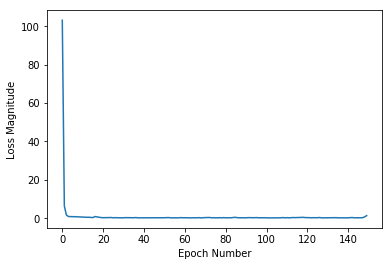

In [46]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_0.history['loss'])

In [47]:
## Run the test examples through the model.
errors = outputs = 0
for i in range(num_tests):
    test = np_test[i, 2:6]
    prediction = model_0.predict(np.array([test]))
    out = np_test[i, 1]
    
    print("Prediction: {}, Expected: {}".format(prediction[0][0], out))
    errors += abs(prediction - out)
    outputs += abs(out)
    
errors = errors[0][0]  ## Extract out the single real number.
print('')
print('Mean error on test set: {}'.format(errors / num_tests))
print('Mean error % on test set: {}'.format(errors / outputs * 100))

Prediction: 1.0474932193756104, Expected: 1.5090000000000001
Prediction: 0.7587658166885376, Expected: 1.915
Prediction: -0.22289448976516724, Expected: 0.9540000000000001
Prediction: 0.26625555753707886, Expected: 0.547
Prediction: -0.009646892547607422, Expected: 0.214
Prediction: -0.9913070797920227, Expected: 0.031
Prediction: 0.1983676552772522, Expected: 0.179
Prediction: -0.07757121324539185, Expected: 0.022000000000000002
Prediction: -1.123173475265503, Expected: 0.001

Mean error on test set: 0.6182718276977539
Mean error % on test set: 103.58239853461997
